# Project tasks 

1.Selecting Top 10 tec stocks based on market value.
2.Analyise those stocks and select one stock to invest considering return and risk 
3.Create backtesting strategy 


In [1]:
# Import libries

import pandas as pd
import yfinance as yf
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import requests
from bs4 import BeautifulSoup
warnings.filterwarnings('ignore')
import re
%matplotlib inline
plt.style.use('seaborn')

In [2]:
# Scrape tec stock data from yahoo finance 

URL = 'https://finance.yahoo.com/u/yahoo-finance/watchlists/tech-stocks-that-move-the-market/'
#Header for request

header = ({'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36','Accept-Language':'en-US,en;q=0.5'})            

In [3]:
#HTTP request

yfpage = requests.get(URL,headers=header)

In [4]:
yfpage

<Response [200]>

In [5]:
# soup containing all data
soup = BeautifulSoup(yfpage.content,'html.parser')

In [6]:
# Find tabels need scrape
alldata = soup.find_all('tbody')
print(f'Number of tabels:{len(alldata)}')

Number of tabels:2


In [7]:
#selecting only 2nd tabel 

tb = alldata[1]

# Store table data in a list
dt = []

# accessing all rows in tables
rows = tb.find_all("tr")
for row in rows:
    # accessing all columns
    columns = row.find_all("td")
    dt_row = [col.text.strip() for col in columns]
    dt.append(dt_row)
        
        
        
df = pd.DataFrame(dt,columns=['Symbol','Company Name','Last Price','Change','% Change','Market Time','Volume','Avg Vol-3 month)','Market Cap'])
        
        

In [8]:
df

,Symbol,Company Name,Last Price,Change,% Change,Market Time,Volume,Avg Vol-3 month),Market Cap
0,MSFT,Microsoft Corporation,393.87,+4.40,+1.13%,4:00 PM EST,21.97M,26.46M,"2,927.34B"
1,AAPL,Apple Inc.,188.63,+5.95,+3.26%,4:00 PM EST,77.08M,54.31M,"2,916.58B"
2,GOOG,Alphabet Inc.,144.99,+2.10,+1.47%,4:00 PM EST,18.63M,22.17M,"1,804.44B"
3,AMZN,"Amazon.com, Inc.",153.5,+1.79,+1.18%,4:00 PM EST,37.75M,50.31M,"1,586.27B"
4,NVDA,NVIDIA Corporation,571.07,+10.54,+1.88%,4:00 PM EST,48.51M,42.52M,"1,410.54B"
5,META,"Meta Platforms, Inc.",376.13,+7.76,+2.11%,4:00 PM EST,15.97M,18.04M,966.60B
6,TSLA,"Tesla, Inc.",211.88,-3.67,-1.70%,4:00 PM EST,107.98M,117.60M,673.55B
7,CRM,"Salesforce, Inc.",274.46,+3.02,+1.11%,4:00 PM EST,4.72M,5.52M,265.68B
8,AMD,"Advanced Micro Devices, Inc.",162.67,+2.50,+1.56%,4:00 PM EST,130.92M,61.48M,262.79B
9,INTC,Intel Corporation,46.74,+0.68,+1.48%,4:00 PM EST,46.55M,40.86M,197.06B


In [9]:
# Get information of all columns data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Symbol            18 non-null     object
 1   Company Name      18 non-null     object
 2   Last Price        18 non-null     object
 3   Change            18 non-null     object
 4   % Change          18 non-null     object
 5   Market Time       18 non-null     object
 6   Volume            18 non-null     object
 7   Avg Vol-3 month)  18 non-null     object
 8   Market Cap        18 non-null     object
dtypes: object(9)
memory usage: 1.4+ KB


In [10]:
# Remove empty rows

df = df.iloc[:17,:] #remove 17th row from the df

In [11]:
df

,Symbol,Company Name,Last Price,Change,% Change,Market Time,Volume,Avg Vol-3 month),Market Cap
0,MSFT,Microsoft Corporation,393.87,+4.40,+1.13%,4:00 PM EST,21.97M,26.46M,"2,927.34B"
1,AAPL,Apple Inc.,188.63,+5.95,+3.26%,4:00 PM EST,77.08M,54.31M,"2,916.58B"
2,GOOG,Alphabet Inc.,144.99,+2.10,+1.47%,4:00 PM EST,18.63M,22.17M,"1,804.44B"
3,AMZN,"Amazon.com, Inc.",153.5,+1.79,+1.18%,4:00 PM EST,37.75M,50.31M,"1,586.27B"
4,NVDA,NVIDIA Corporation,571.07,+10.54,+1.88%,4:00 PM EST,48.51M,42.52M,"1,410.54B"
5,META,"Meta Platforms, Inc.",376.13,+7.76,+2.11%,4:00 PM EST,15.97M,18.04M,966.60B
6,TSLA,"Tesla, Inc.",211.88,-3.67,-1.70%,4:00 PM EST,107.98M,117.60M,673.55B
7,CRM,"Salesforce, Inc.",274.46,+3.02,+1.11%,4:00 PM EST,4.72M,5.52M,265.68B
8,AMD,"Advanced Micro Devices, Inc.",162.67,+2.50,+1.56%,4:00 PM EST,130.92M,61.48M,262.79B
9,INTC,Intel Corporation,46.74,+0.68,+1.48%,4:00 PM EST,46.55M,40.86M,197.06B


In [12]:
#change data type of columns 

def column_processer(data,cols):
    
    for col in cols:
    
        data[col] = data[col].str.strip().apply(lambda x : re.sub(r'[A-Za-z,%]',"",x) )
         
        data[col] = pd.to_numeric(data[col],errors='coerce').astype(float)
 

In [13]:
#apply funtion 
column_processer(df,['Last Price','Change','% Change','Volume','Avg Vol-3 month)','Market Cap'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Symbol            17 non-null     object 
 1   Company Name      17 non-null     object 
 2   Last Price        17 non-null     float64
 3   Change            17 non-null     float64
 4   % Change          17 non-null     float64
 5   Market Time       17 non-null     object 
 6   Volume            17 non-null     float64
 7   Avg Vol-3 month)  17 non-null     float64
 8   Market Cap        17 non-null     float64
dtypes: float64(6), object(3)
memory usage: 1.3+ KB


In [15]:
# set index
df= df.set_index('Symbol')
# Rename columns 
df.rename(columns={'Volume':'Volume(M)','Avg Vol-3 month)':'Avg Vol-3 month(M)','Market Cap':'Market Cap(B)'}
          ,inplace=True)
df

,Company Name,Last Price,Change,% Change,Market Time,Volume(M),Avg Vol-3 month(M),Market Cap(B)
Symbol,,,,,,,,
MSFT,Microsoft Corporation,393.87,4.40,1.13,4:00 PM EST,21.97,26.46,2927.34
AAPL,Apple Inc.,188.63,5.95,3.26,4:00 PM EST,77.08,54.31,2916.58
GOOG,Alphabet Inc.,144.99,2.10,1.47,4:00 PM EST,18.63,22.17,1804.44
AMZN,"Amazon.com, Inc.",153.50,1.79,1.18,4:00 PM EST,37.75,50.31,1586.27
NVDA,NVIDIA Corporation,571.07,10.54,1.88,4:00 PM EST,48.51,42.52,1410.54
META,"Meta Platforms, Inc.",376.13,7.76,2.11,4:00 PM EST,15.97,18.04,966.60
TSLA,"Tesla, Inc.",211.88,-3.67,-1.70,4:00 PM EST,107.98,117.60,673.55
CRM,"Salesforce, Inc.",274.46,3.02,1.11,4:00 PM EST,4.72,5.52,265.68
AMD,"Advanced Micro Devices, Inc.",162.67,2.50,1.56,4:00 PM EST,130.92,61.48,262.79


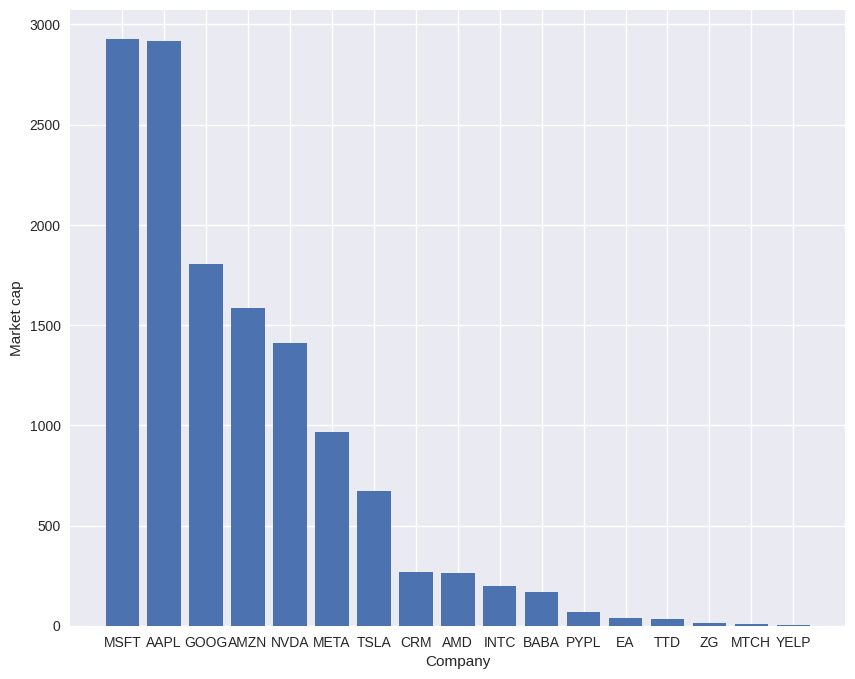

In [16]:
# EDA 

#plot market value 

plt.figure(figsize=(10,8))
plt.bar(df.index,df['Market Cap(B)'])
plt.xlabel('Company')
plt.ylabel('Market cap')
plt.show()

Base on above graph, best 8 tec companies by market cap as below

MSFT,AAPL,GOOG,AMZN,NVDA,META,TSLA,CRM

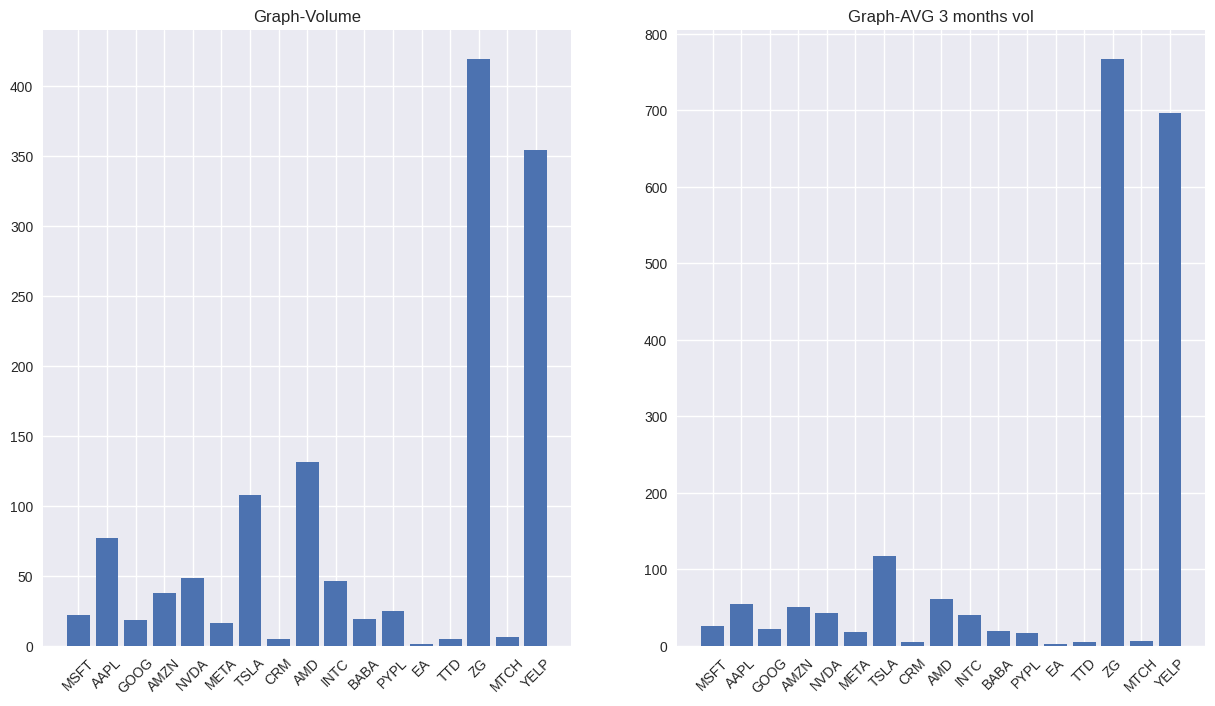

In [17]:
# plot market volume & AVG 3 month volumns

fig , ax = plt.subplots(nrows=1,ncols=2,figsize=(15,8))
ax[0].bar(df.index,df['Volume(M)'])
ax[0].set_title('Graph-Volume')
ax[0].tick_params(axis='x',rotation=45)

ax[1].bar(df.index,df['Avg Vol-3 month(M)'])
ax[1].set_title('Graph-AVG 3 months vol')
ax[1].tick_params(axis='x',rotation=45)



Based on the high volumes and AVG 3 months volumns of YELP,ZG and TSLA tec companies indicates investors interest in those stocks more than others. 

But generally we can not pick a company based on market value or the volums.In order to pick the most sutiable stock we need to carry out depth analysis collecting all revenue and sale details. 

But In this project I will proceed  all analysis with top 10 companies based on thier market values.
And I will consider all stock details from '2010-01-01'.


In [18]:
# Get of top 10 compaines by thier market value

Top10 = df.sort_values(by='Market Cap(B)',ascending=False).head(10)


In [19]:
Top10

,Company Name,Last Price,Change,% Change,Market Time,Volume(M),Avg Vol-3 month(M),Market Cap(B)
Symbol,,,,,,,,
MSFT,Microsoft Corporation,393.87,4.40,1.13,4:00 PM EST,21.97,26.46,2927.34
AAPL,Apple Inc.,188.63,5.95,3.26,4:00 PM EST,77.08,54.31,2916.58
GOOG,Alphabet Inc.,144.99,2.10,1.47,4:00 PM EST,18.63,22.17,1804.44
AMZN,"Amazon.com, Inc.",153.50,1.79,1.18,4:00 PM EST,37.75,50.31,1586.27
NVDA,NVIDIA Corporation,571.07,10.54,1.88,4:00 PM EST,48.51,42.52,1410.54
META,"Meta Platforms, Inc.",376.13,7.76,2.11,4:00 PM EST,15.97,18.04,966.60
TSLA,"Tesla, Inc.",211.88,-3.67,-1.70,4:00 PM EST,107.98,117.60,673.55
CRM,"Salesforce, Inc.",274.46,3.02,1.11,4:00 PM EST,4.72,5.52,265.68
AMD,"Advanced Micro Devices, Inc.",162.67,2.50,1.56,4:00 PM EST,130.92,61.48,262.79


In [20]:
# List of top 10 tec stocks
Top10L = [x for x in Top10.index]

In [21]:
stocks = yf.download(tickers=Top10L,start='2010-01-01',end='2024-01-15')

[*********************100%%**********************]  10 of 10 completed


In [22]:
# Covert to CSV 

stocks.to_csv('stocks.csv')

In [23]:
# Convert to dataframe

df = pd.read_csv('stocks.csv',header=[0,1],parse_dates=[0],index_col=[0])

In [24]:
df

Adj Close                                                  \
                  AAPL         AMD        AMZN         CRM        GOOG   
Date                                                                     
2010-01-04    6.478997    9.700000    6.695000   18.705000   15.610239   
2010-01-05    6.490201    9.710000    6.734500   18.625000   15.541497   
2010-01-06    6.386965    9.570000    6.612500   18.592501   15.149715   
2010-01-07    6.375156    9.470000    6.500000   18.510000   14.797037   
2010-01-08    6.417541    9.430000    6.676000   18.537500   14.994298   
...                ...         ...         ...         ...         ...   
2024-01-08  185.559998  146.179993  149.100006  260.869995  140.529999   
2024-01-09  185.139999  149.259995  151.369995  261.339996  142.559998   
2024-01-10  186.190002  148.539993  153.729996  264.130005  143.800003   
2024-01-11  185.589996  148.020004  155.179993  271.380005  143.669998   
2024-01-12  185.919998  146.559998  154.619995  271.929993  144.240005   

                                                                       ...  \
                 INTC        META        MSFT        NVDA        TSLA  ...   
Date                                                                   ...   
2010-01-04  13.700493         NaN   23.474922    4.240428         NaN  ...   
2010-01-05  13.693935         NaN   23.482500    4.302350         NaN  ...   
2010-01-06  13.648001         NaN   23.338394    4.329870         NaN  ...   
2010-01-07  13.516768         NaN   23.095682    4.245018         NaN  ...   
2010-01-08  13.667686         NaN   23.254963    4.254188         NaN  ...   
...               ...         ...         ...         ...         ...  ...   
2024-01-08  48.450001  358.660004  374.690002  522.530029  240.449997  ...   
2024-01-09  48.049999  357.429993  375.790009  531.400024  234.960007  ...   
2024-01-10  47.470001  370.470001  382.769989  543.500000  233.940002  ...   
2024-01-11  47.639999  369.670013  384.630005  548.219971  227.220001  ...   
2024-01-12  47.119999  374.489990  388.470001  547.099976  218.889999  ...   

               Volume                                                     \
                 AAPL       AMD       AMZN      CRM       GOOG      INTC   
Date                                                                       
2010-01-04  493729600  18748700  151998000  7906000   78541293  47800900   
2010-01-05  601904800  22145700  177038000  7942400  120638494  52357700   
2010-01-06  552160000  18643400  143576000  5122400  159744526  40037400   
2010-01-07  477131200  26806800  220604000  4840000  257533695  54041500   
2010-01-08  447610800  13752800  196610000  5510400  189680313  48234700   
...               ...       ...        ...      ...        ...       ...   
2024-01-08   59144500  71756900   46757100  6626000   17645300  42135100   
2024-01-09   42841800  67875700   43812600  4571800   19579700  30097000   
2024-01-10   46792900  56951200   44421800  5128300   16641900  31480200   
2024-01-11   49128400  62764600   49072700  9012600   17471100  31707900   
2024-01-12   40444700  48250800   40460300  4847000   13995200  27448800   

                                                         
                  META      MSFT      NVDA         TSLA  
Date                                                     
2010-01-04         NaN  38409100  80020400          NaN  
2010-01-05         NaN  49749600  72864800          NaN  
2010-01-06         NaN  58182400  64916800          NaN  
2010-01-07         NaN  50559700  54779200          NaN  
2010-01-08         NaN  51197400  47816800          NaN  
...                ...       ...       ...          ...  
2024-01-08  13890200.0  23134000  64251000   85166600.0  
2024-01-09  13463900.0  20830000  77310000   96705700.0  
2024-01-10  22117200.0  25514200  53379600   91628500.0  
2024-01-11  17205400.0  27850800  59675900  105873600.0  
2024-01-12  19295700.0  21645700  35247900  122889000.0  

[3531

In [25]:
#further analytics we are going to chose 'Close' price 

df_close = df['Close'].copy()


In [26]:
# Normalizing data points for plotting

close_nml = df_close.div(df_close.iloc[0]).mul(100)

In [27]:
df_close.dropna()

,AAPL,AMD,AMZN,CRM,GOOG,INTC,META,MSFT,NVDA,TSLA
Date,,,,,,,,,,
2012-05-18,18.942142,6.010000,10.692500,36.395000,14.953949,26.070000,38.230000,29.270000,3.020000,1.837333
2012-05-21,20.045713,6.300000,10.905500,37.262501,15.295419,26.150000,34.029999,29.750000,3.072500,1.918000
2012-05-22,19.891787,6.160000,10.766500,37.362499,14.963912,26.030001,31.000000,29.760000,3.035000,2.053333
2012-05-23,20.377144,6.080000,10.864000,37.652500,15.179603,25.440001,32.000000,29.110001,3.110000,2.068000
2012-05-24,20.190001,6.020000,10.762000,36.552502,15.035145,25.650000,33.029999,29.070000,3.027500,2.018667
...,...,...,...,...,...,...,...,...,...,...
2024-01-08,185.559998,146.179993,149.100006,260.869995,140.529999,48.450001,358.660004,374.690002,522.530029,240.449997
2024-01-09,185.139999,149.259995,151.369995,261.339996,142.559998,48.049999,357.429993,375.790009,531.400024,234.960007
2024-01-10,186.190002,148.539993,153.729996,264.130005,143.800003,47.470001,370.470001,382.769989,543.500000,233.940002


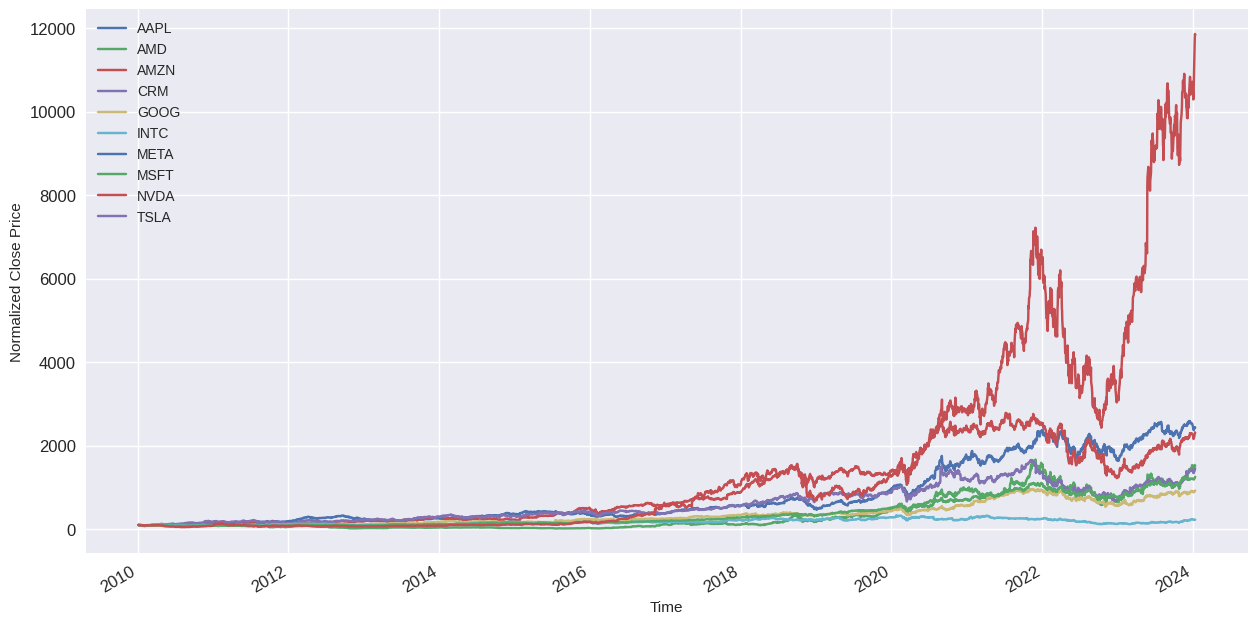

In [28]:
close_nml.plot(figsize=(15,8),fontsize=12)
plt.xlabel('Time')
plt.ylabel('Normalized Close Price')
plt.show()

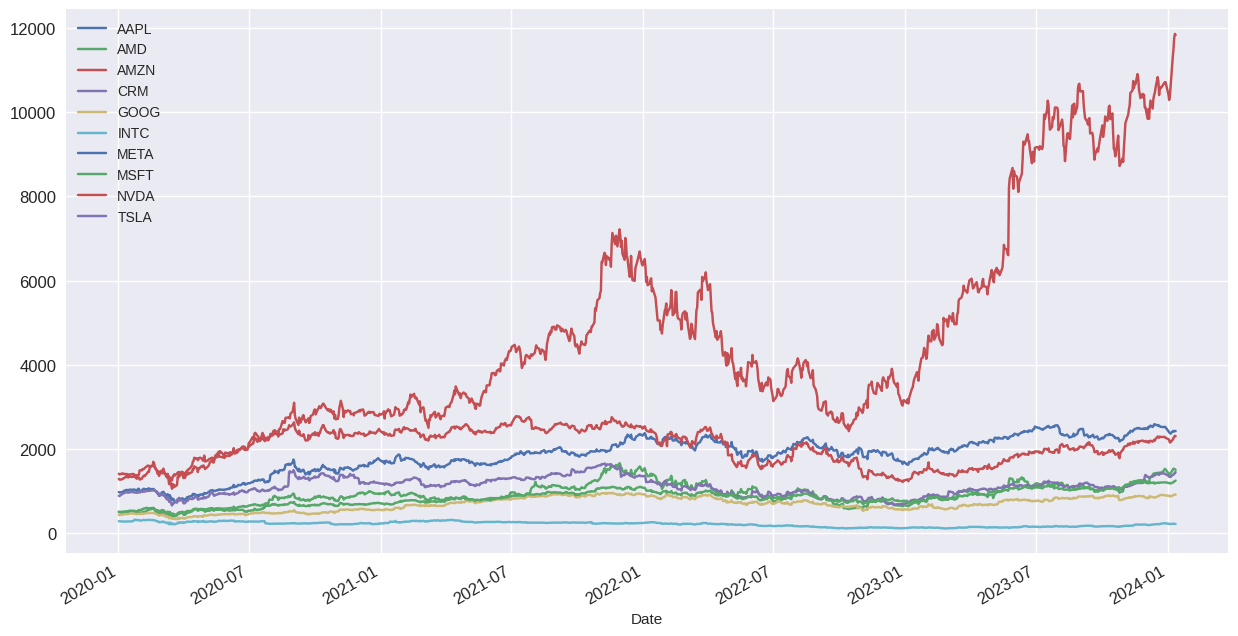

In [29]:
#Lets take close view from 2020 

close_nml.loc['2020-01-01':].plot(figsize=(15,8),fontsize=12)
plt.show()

Based on the above graphs we can clearly identify that NVDA stocks have visibale upward trend over the period
compare to other tec stocks.

In [30]:
# Let get the pecetage diffrence 

returns = df_close.pct_change(periods=1)

In [31]:
returns.dropna(inplace=True)

In [32]:
returns.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,2931.0,0.000940,0.017901,-0.128647,-0.007559,0.000758,0.010264,0.119808
AMD,2931.0,0.001740,0.036356,-0.242291,-0.016481,0.000000,0.019091,0.522901
AMZN,2931.0,0.001118,0.020364,-0.140494,-0.008758,0.000946,0.011439,0.141311
CRM,2931.0,0.000919,0.021655,-0.158885,-0.009263,0.000929,0.011681,0.260449
GOOG,2931.0,0.000919,0.017098,-0.111008,-0.006905,0.000698,0.009116,0.160524
INTC,2931.0,0.000397,0.019697,-0.180415,-0.008820,0.000551,0.009678,0.195213
META,2931.0,0.001098,0.025258,-0.263901,-0.010018,0.001001,0.012867,0.296115
MSFT,2931.0,0.001023,0.016753,-0.147390,-0.006922,0.000699,0.009456,0.142169
NVDA,2931.0,0.002158,0.027817,-0.187559,-0.011057,0.001946,0.015185,0.298067
TSLA,2931.0,0.002260,0.035554,-0.210628,-0.015290,0.001354,0.019128,0.243951


In [33]:
# taking mean and std for futher calculations
rtn_df = returns.describe().T.loc[:,['mean','std']]

In [34]:
 rtn_df

,mean,std
AAPL,0.000940,0.017901
AMD,0.001740,0.036356
AMZN,0.001118,0.020364
CRM,0.000919,0.021655
GOOG,0.000919,0.017098
INTC,0.000397,0.019697
META,0.001098,0.025258
MSFT,0.001023,0.016753
NVDA,0.002158,0.027817
TSLA,0.002260,0.035554


In [35]:
# calculate annual mean and  std

rtn_df['annual_mean'] = rtn_df['mean']*252

rtn_df['annual_std'] = rtn_df['std']*np.sqrt(252)

In [36]:
rtn_df

,mean,std,annual_mean,annual_std
AAPL,0.000940,0.017901,0.236877,0.284165
AMD,0.001740,0.036356,0.438403,0.577138
AMZN,0.001118,0.020364,0.281862,0.323273
CRM,0.000919,0.021655,0.231652,0.343762
GOOG,0.000919,0.017098,0.231620,0.271416
INTC,0.000397,0.019697,0.099959,0.312687
META,0.001098,0.025258,0.276754,0.400959
MSFT,0.001023,0.016753,0.257759,0.265945
NVDA,0.002158,0.027817,0.543863,0.441586
TSLA,0.002260,0.035554,0.569623,0.564403


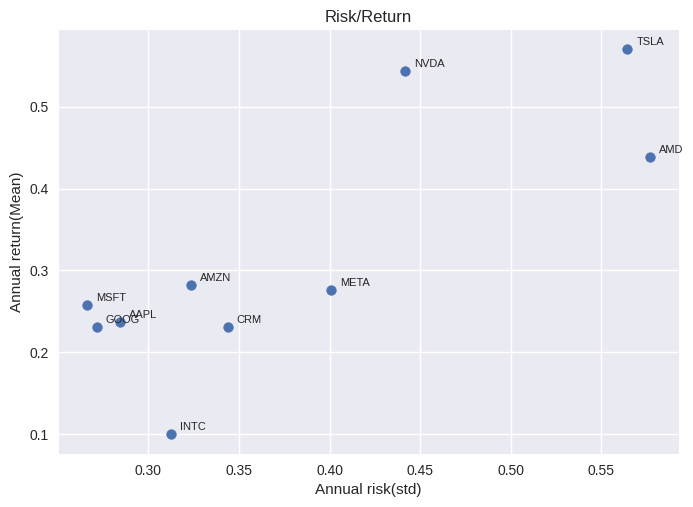

In [37]:
# Plot riks and return 

rtn_df.plot.scatter(x='annual_std',y='annual_mean',s=50)
for i in rtn_df.index:
    plt.annotate(i,xy=(rtn_df.loc[i,'annual_std']+0.005,rtn_df.loc[i,'annual_mean']+0.005),size=8)

plt.xlabel('Annual risk(std)')
plt.ylabel('Annual return(Mean)')
plt.title('Risk/Return')
plt.show()


This graph indicate TSLA,NVSA and AMD have higest returns compair to other tec stocks but with huge risk.
As per the result the less risk stock with commanding return is MSFT. So I will pick MSFT as the tec stock to invenst.

In [38]:
# Correlation among tec stocks

df_close.corr()

,AAPL,AMD,AMZN,CRM,GOOG,INTC,META,MSFT,NVDA,TSLA
AAPL,1.000000,0.969517,0.892631,0.890533,0.967018,0.499920,0.802300,0.987979,0.923105,0.947382
AMD,0.969517,1.000000,0.902453,0.900315,0.951471,0.517689,0.841179,0.976718,0.909946,0.947300
AMZN,0.892631,0.902453,1.000000,0.981933,0.936002,0.782668,0.927242,0.926729,0.766206,0.836452
CRM,0.890533,0.900315,0.981933,1.000000,0.937542,0.782020,0.944542,0.928409,0.787671,0.820464
GOOG,0.967018,0.951471,0.936002,0.937542,1.000000,0.627609,0.885554,0.981364,0.890057,0.926902
INTC,0.499920,0.517689,0.782668,0.782020,0.627609,1.000000,0.738154,0.578052,0.363955,0.402338
META,0.802300,0.841179,0.927242,0.944542,0.885554,0.738154,1.000000,0.859414,0.768736,0.736435
MSFT,0.987979,0.976718,0.926729,0.928409,0.981364,0.578052,0.859414,1.000000,0.922654,0.924741
NVDA,0.923105,0.909946,0.766206,0.787671,0.890057,0.363955,0.768736,0.922654,1.000000,0.852267
TSLA,0.947382,0.947300,0.836452,0.820464,0.926902,0.402338,0.736435,0.924741,0.852267,1.000000


<Axes: >

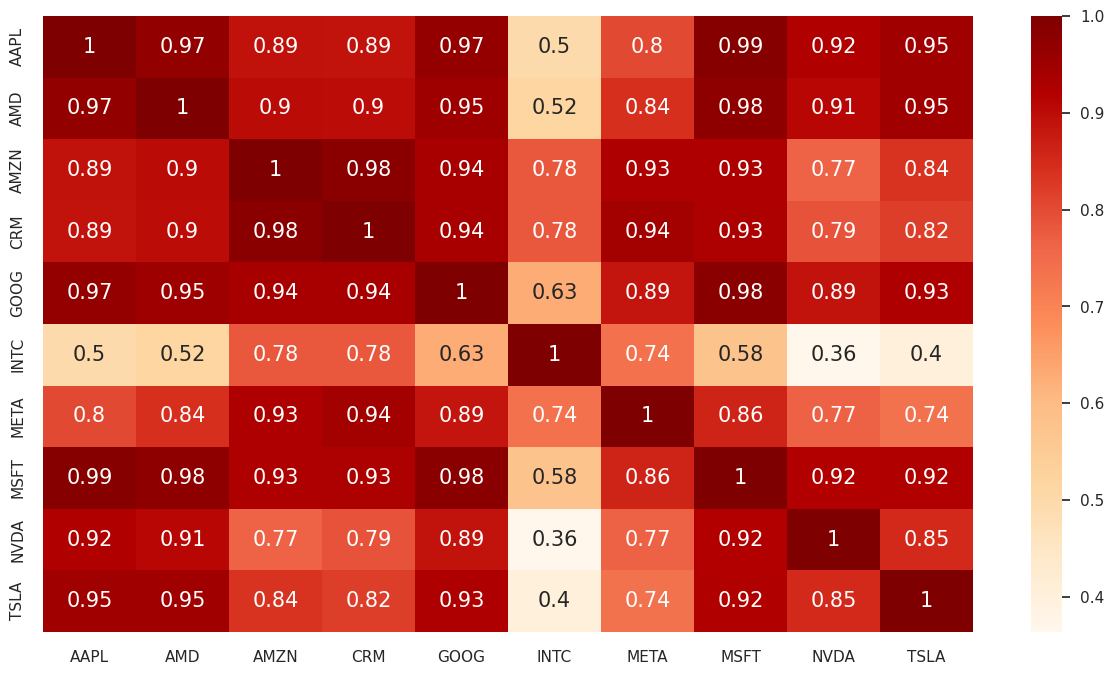

In [39]:
# plot the heatmap

plt.figure(figsize=(15,8))
sns.set(font_scale=1)
sns.heatmap(df_close.corr(),cmap='OrRd',annot=True,annot_kws={'size':15})

Above graph indicate MSFT highly correlated with most of the tec stocks except INTC.

In [40]:
# Chose MSFT 

MSFT = df_close.MSFT

In [41]:
# To dataframe

MSFT = MSFT.to_frame()

In [42]:
# Lets get number of Nan values in the DF

MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3531 entries, 2010-01-04 to 2024-01-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSFT    3531 non-null   float64
dtypes: float64(1)
memory usage: 184.2 KB


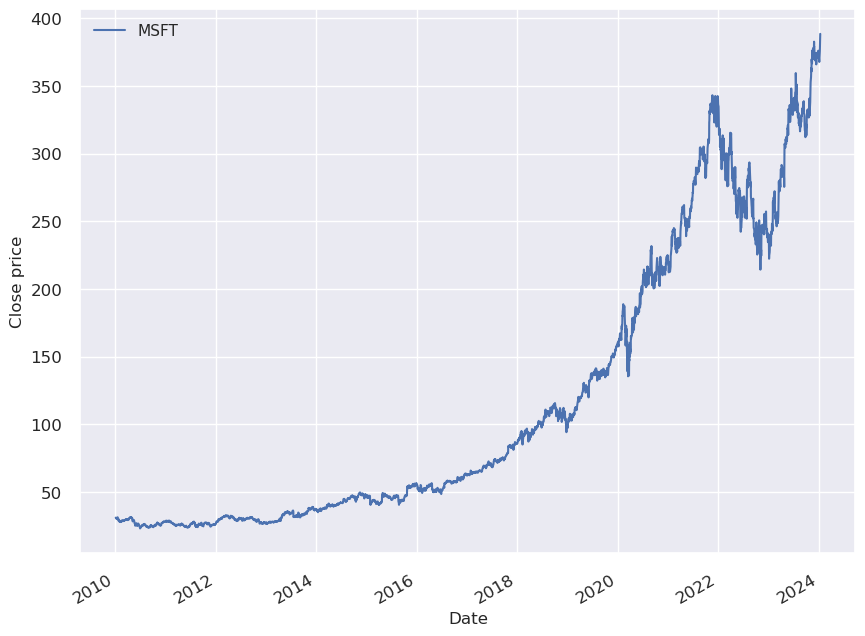

In [43]:
#Plot the graph 
MSFT.plot(figsize=(10,8),fontsize=12)
plt.xlabel('Date')
plt.ylabel('Close price')
plt.show()

In [44]:

#calculate the log mean
MSFT['l_return'] = np.log(MSFT.div(MSFT.shift(1)))
MSFT.dropna(inplace=True)

In [45]:
# calculate the  cumulative retuen 

MSFT['cumreturn'] = MSFT.l_return.cumsum().apply(np.exp)

In [46]:
MSFT

,MSFT,l_return,cumreturn
Date,,,
2010-01-05,30.959999,0.000323,1.000323
2010-01-06,30.770000,-0.006156,0.994184
2010-01-07,30.450001,-0.010454,0.983845
2010-01-08,30.660000,0.006873,0.990630
2010-01-11,30.270000,-0.012802,0.978029
...,...,...,...
2024-01-08,374.690002,0.018696,12.106300
2024-01-09,375.790009,0.002931,12.141842
2024-01-10,382.769989,0.018404,12.367366


In [47]:
#Annual return

MSFT.l_return.mean()*252

0.18060068481010977

In [48]:
#Annual std

MSFT.l_return.std()*np.sqrt(252)

0.25936718473389175

In [49]:
# calculate the drawdown

MSFT['cummax'] = MSFT.cumreturn.cummax()

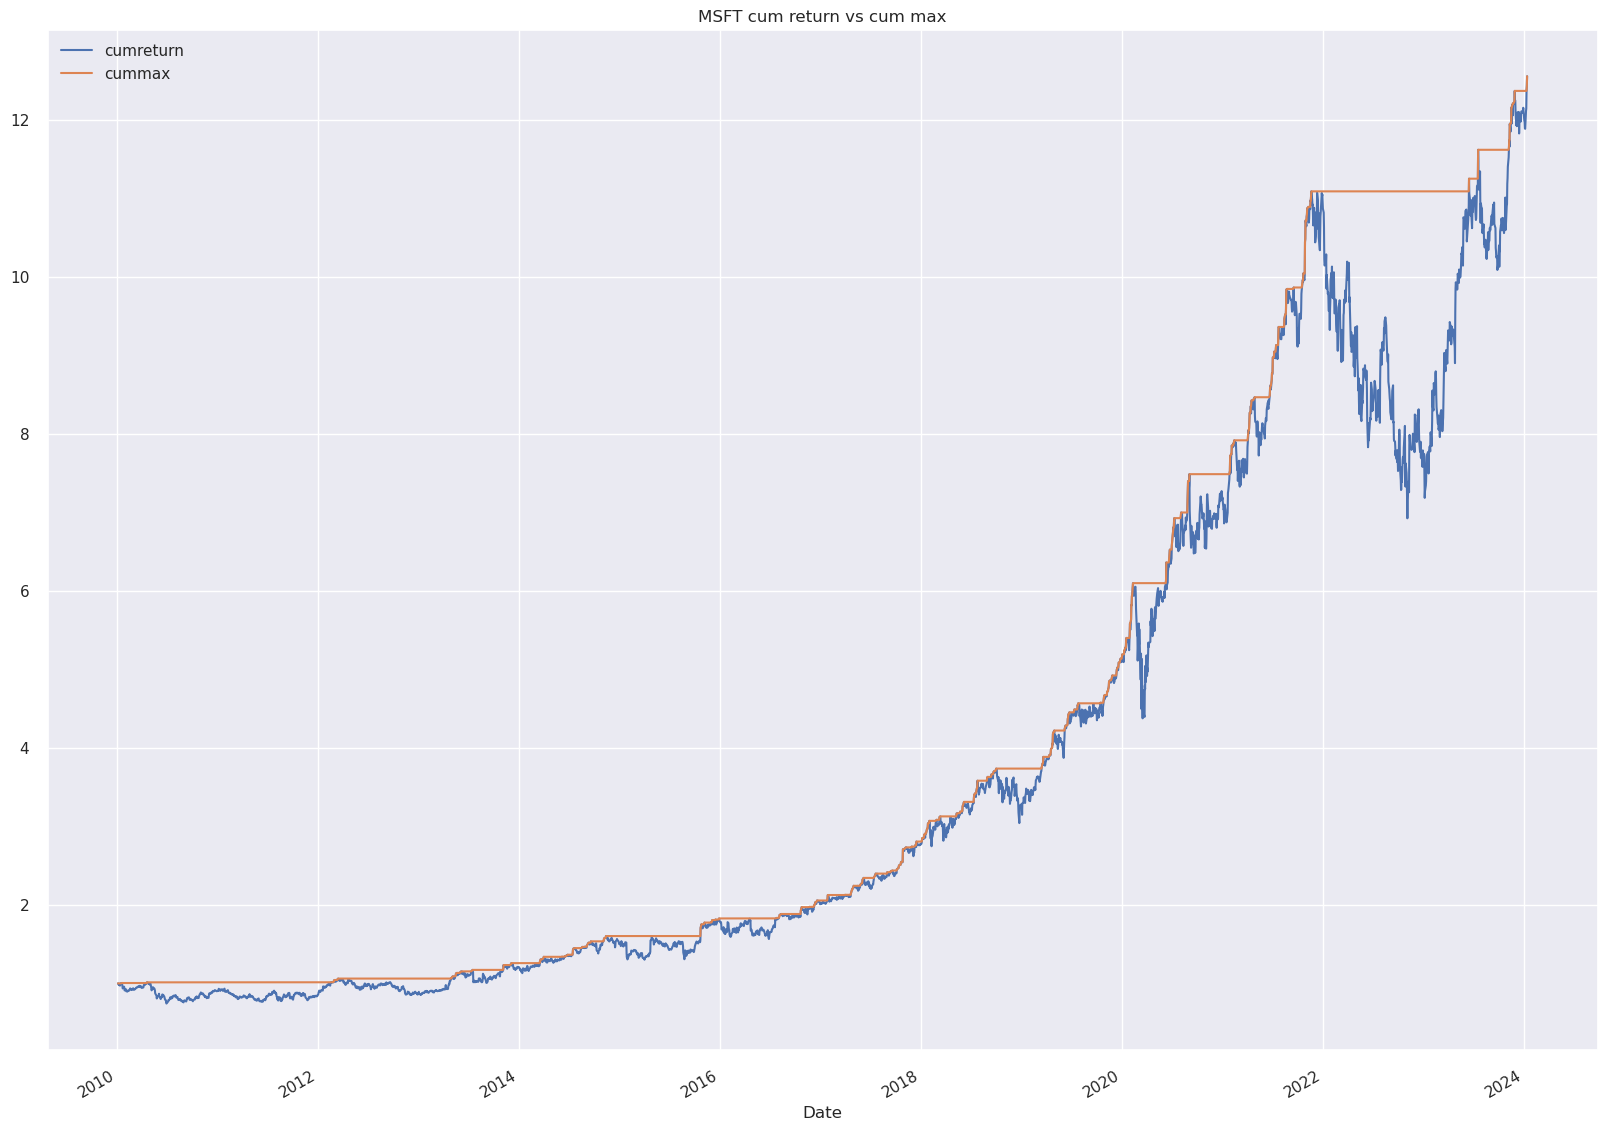

In [50]:
# lets plot cummax and cumreturn 

MSFT[['cumreturn','cummax']].plot(figsize=(20,15),title='MSFT cum return vs cum max')
plt.show()

In [51]:
# Calculate the drawdown

MSFT['drowdown'] = MSFT['cummax'] - MSFT['cumreturn']

In [52]:
# Get the date of maxmiun drow down and date

print(MSFT.drowdown.max())
print(MSFT.drowdown.idxmax())

4.16348892326567
2022-11-03 00:00:00


In [53]:
# calculate drowdown pecentage

MSFT['drowdown%'] = MSFT['drowdown']/ MSFT['cummax']

In [54]:
# getting the higest drowdown % and date

print(MSFT['drowdown%'].max())
print(MSFT['drowdown%'].idxmax())

0.3755646610503881
2022-11-03 00:00:00


In [55]:
# Now we can bulid the SMA simple strategy 

#load data

df_MSFT = yf.download('MSFT',start='2010-01-01',end='2024-01-01')
df_MSFT=df_MSFT.Close.to_frame()

[*********************100%%**********************]  1 of 1 completed


In [57]:
# moving averages 

sma_s =30
sma_l =100

df_MSFT['sma_s'] = df_MSFT.Close.rolling(window=sma_s).mean()
df_MSFT['sma_l'] = df_MSFT.Close.rolling(window=sma_l).mean()

In [78]:
df_MSFT

,Close,returnBH,sma_s,sma_l,position,stratgy,POSITION2
Date,,,,,,,
2010-05-27,26.000000,0.038821,29.256667,29.310800,-1,0.038821,NaN
2010-05-28,25.799999,-0.007722,29.094333,29.259200,-1,0.007722,-1.0
2010-06-01,25.889999,0.003482,28.922667,29.210400,-1,-0.003482,-1.0
2010-06-02,26.459999,0.021777,28.759333,29.170500,-1,-0.021777,-1.0
2010-06-03,26.860001,0.015004,28.610333,29.132500,-1,-0.015004,-1.0
...,...,...,...,...,...,...,...
2023-12-22,374.579987,0.002780,373.289335,342.437702,1,0.002780,1.0
2023-12-26,374.660004,0.000214,373.455668,342.917702,1,0.000214,1.0
2023-12-27,374.070007,-0.001576,373.702002,343.380602,1,-0.001576,1.0


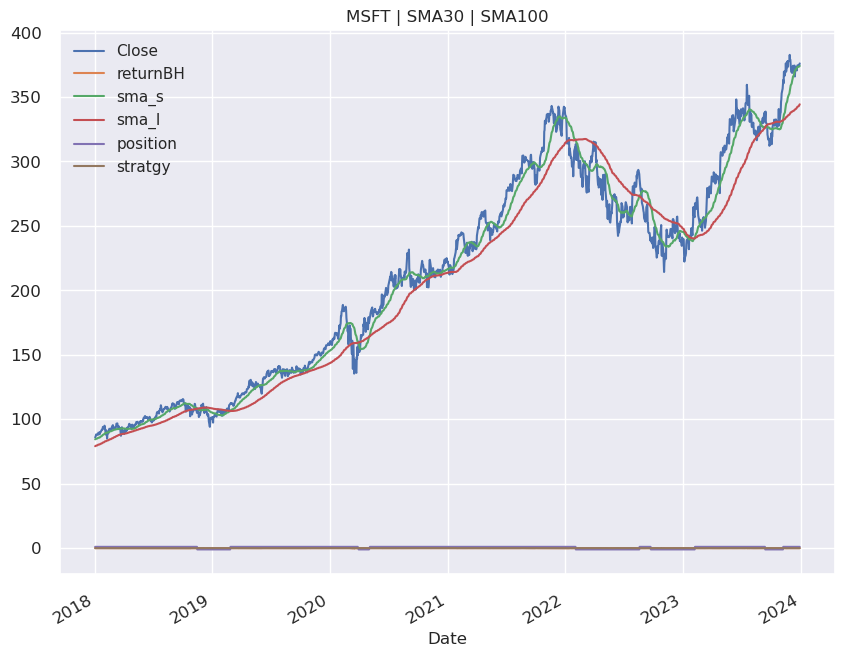

In [62]:
# let plot the graph with SMA year range 2018 to 2024

df_MSFT.loc['2018':,].plot(figsize=(10,8),title = f'MSFT | SMA{sma_s} | SMA{sma_l}',fontsize=12 )
plt.show()

In [96]:
# create backtesting funtion 


def back_test_crossover(stock,start,end,SMA,position):
    
    #load data
    df = yf.download(stock,start=start,end=end)
    #convert to data frame
    data = df.Close.to_frame()
    #return buy and hold
    data['returnB&hH'] = np.log(data.Close.div(data.Close.shift(1)))
    #SMA short
    data['sma_s'] = data.Close.rolling(window=SMA[0]).mean()
    #SMA long
    data['sma_l'] = data.Close.rolling(window=SMA[1]).mean()
    data.dropna(inplace=True)
    #determine the position
    data['position'] = np.where(data['sma_s']>data['sma_l'],position[0],position[1])
    #strategy 
    data['strategy'] = data['returnB&hH']*data.position.shift(1)
    data.dropna(inplace=True)
    
    # annual return and std based on the strategy 
    
    rtn = np.exp(data['strategy'].sum())
    std = data['strategy'].std()*np.sqrt(252)
    
    # plot the SMA and positions
    
    data.loc[:,['sma_s','sma_l','position']].plot(figsize=(20,15),title=f'{stock}-SMA{SMA[0]}|SMA:{SMA[1]}',secondary_y='position')
    
    return data,rtn,std
    
    


[*********************100%%**********************]  1 of 1 completed


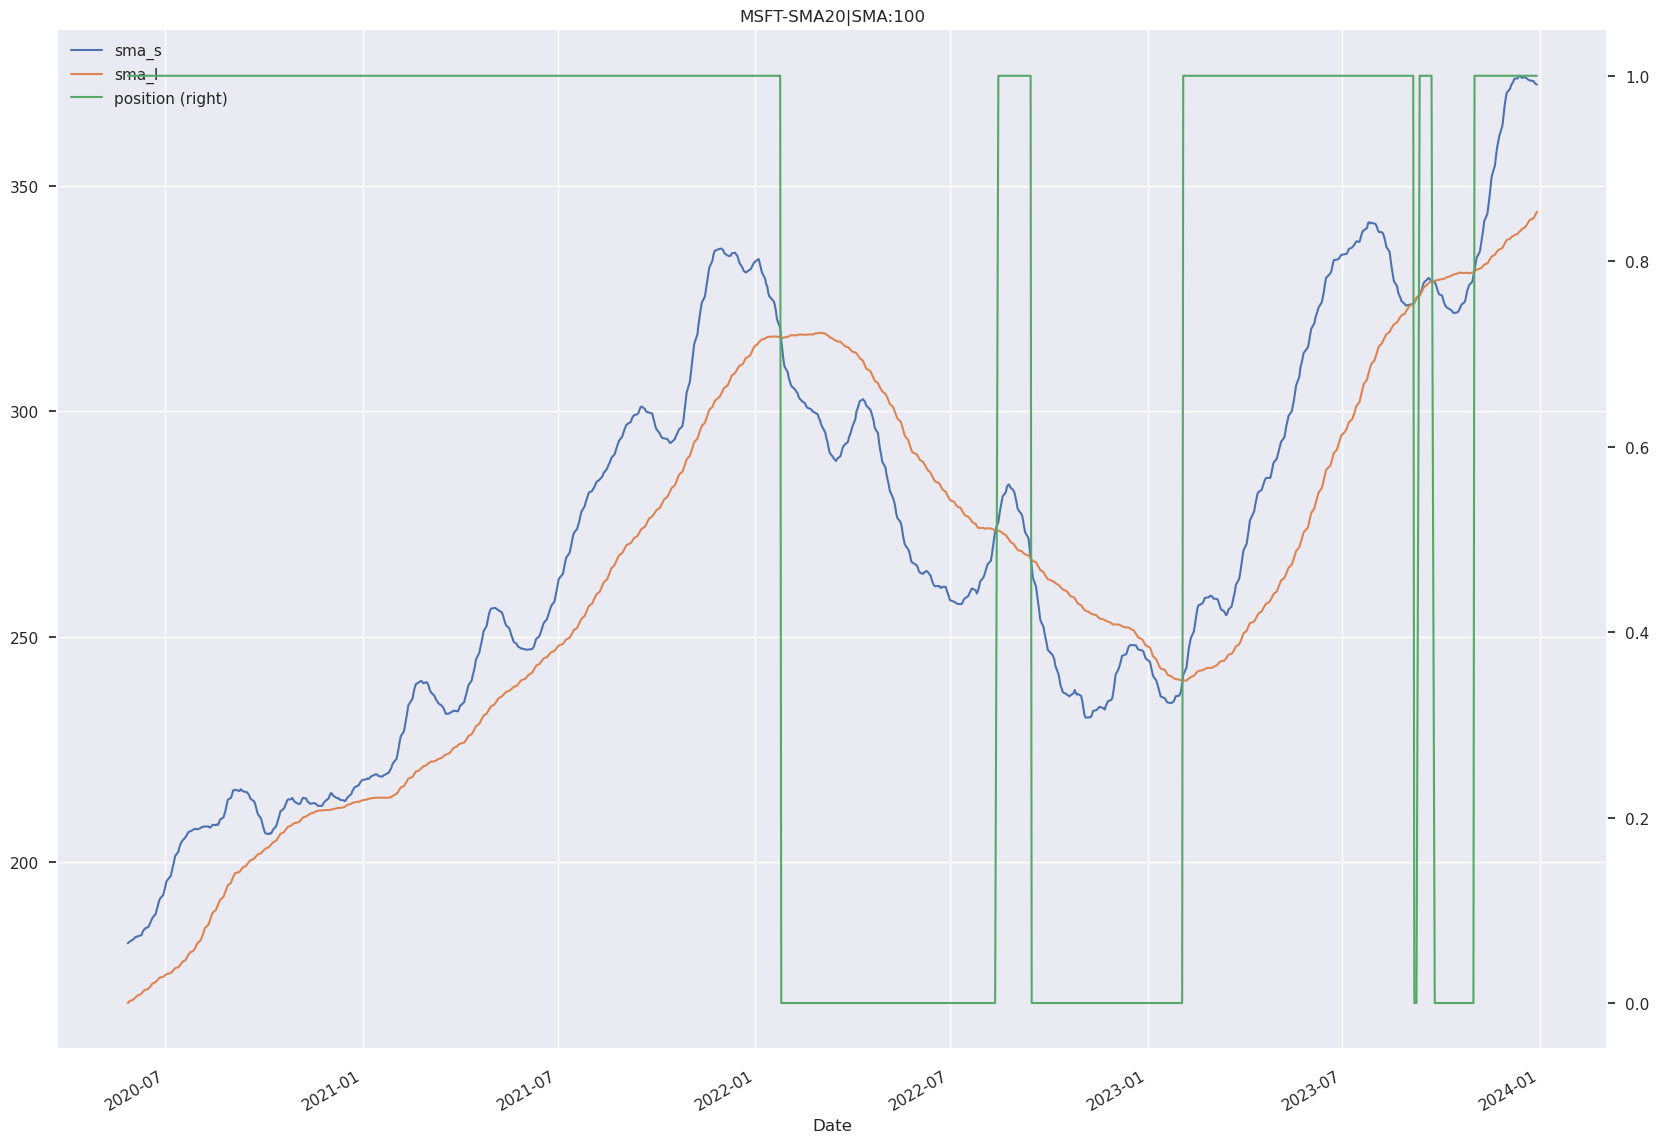

In [97]:
# test MSFT with sma 30 and 100 respectivly 

stratgy1 = back_test_crossover('MSFT',start='2020-01-01',end='2024-01-01',SMA=[20,100],position=[1,0])

In [94]:
stratgy1

(                 Close  returnB&hH       sma_s       sma_l  position  strategy
 Date                                                                          
 2020-05-27  181.809998    0.001321  181.942000  168.672500         1  0.001321
 2020-05-28  181.399994   -0.002258  182.140500  168.900300         1 -0.002258
 2020-05-29  183.250000    0.010147  182.342500  169.142500         1  0.010147
 2020-06-01  182.830002   -0.002295  182.755499  169.395000         1 -0.002295
 2020-06-02  184.910004    0.011312  183.059000  169.643200         1  0.011312
 ...                ...         ...         ...         ...       ...       ...
 2023-12-22  374.579987    0.002780  373.529001  342.437702         1  0.002780
 2023-12-26  374.660004    0.000214  373.331502  342.917702         1  0.000214
 2023-12-27  374.070007   -0.001576  372.900002  343.380602         1 -0.001576
 2023-12-28  375.279999    0.003229  372.721501  343.832302         1  0.003229
 2023-12-29  376.040009    0.002023  372

[*********************100%%**********************]  1 of 1 completed
If you invest 1000 euros pontential income end of the period will be 588.7335955827446 euros


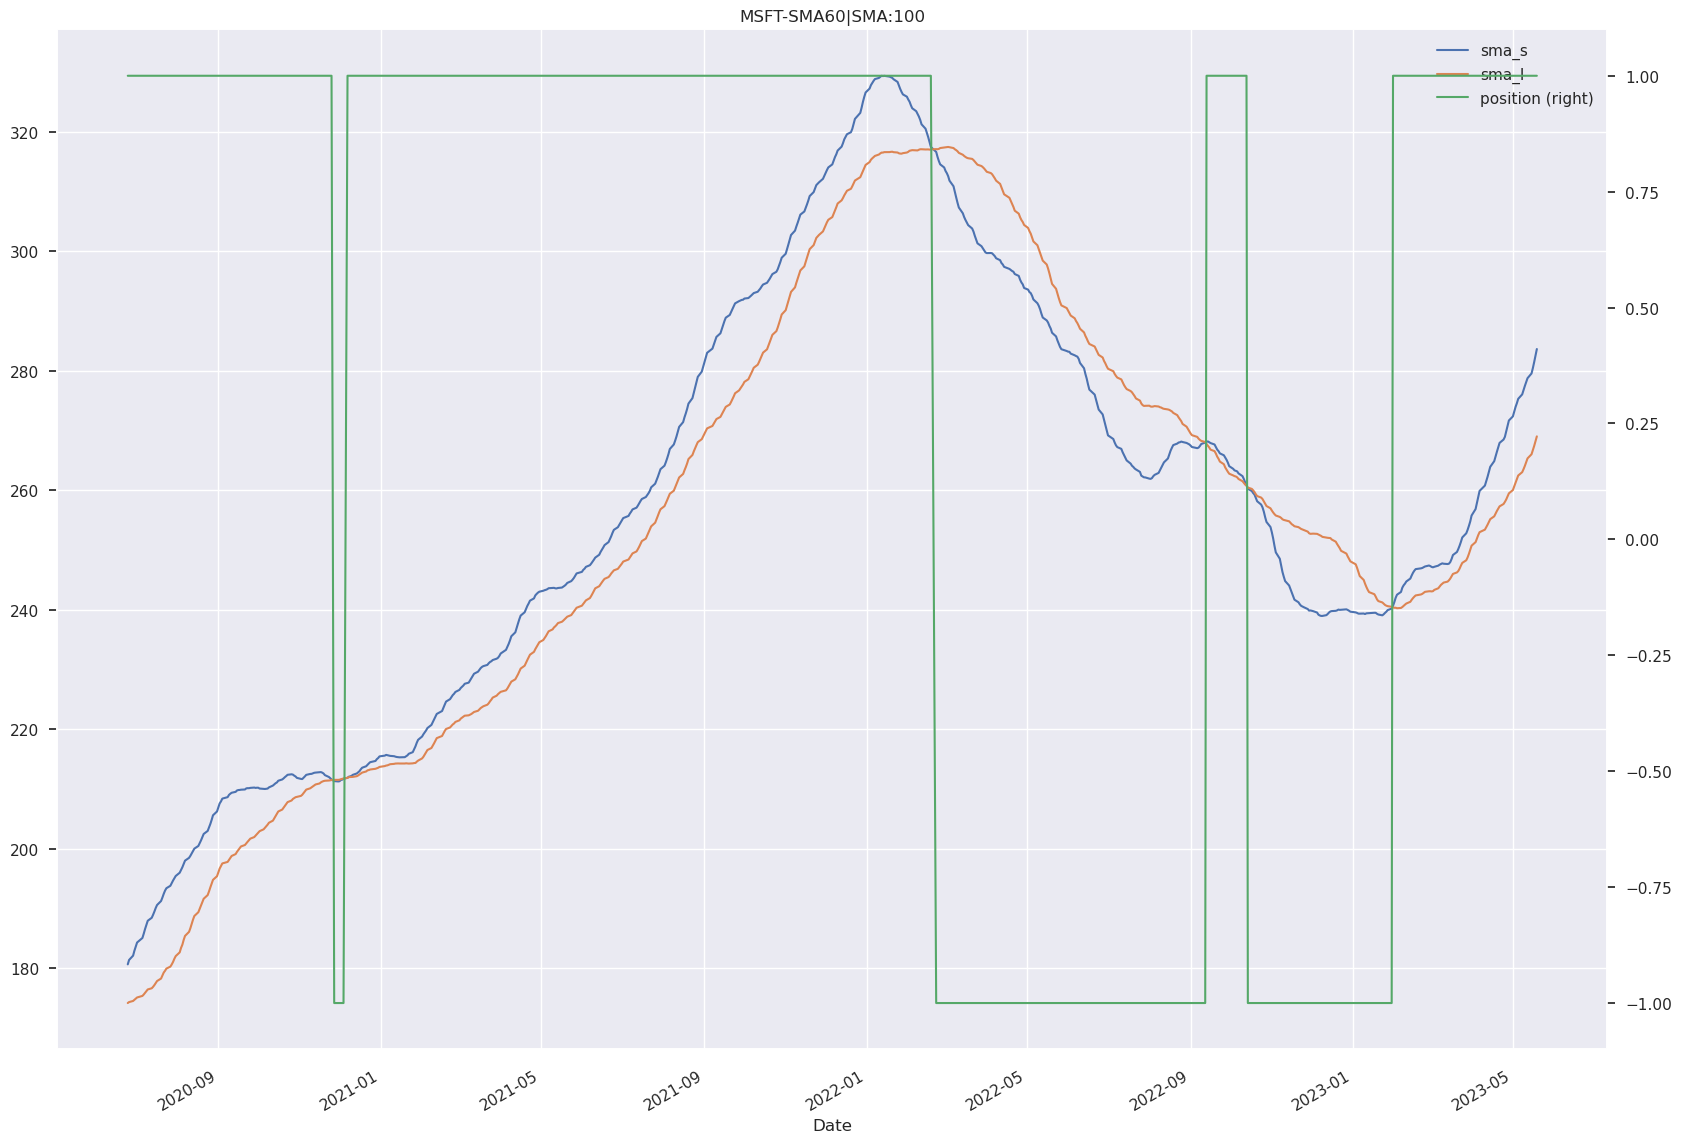

In [109]:
# lets calculate potential income if we invest 1000 EURO for given time period of time


data ,rtn, std = back_test_crossover('MSFT',start='2020-02-01',end='2023-05-20',SMA=[60,100],position=[1,-1])


#Initial invenstment

investment = 1000

# calculate position value

data['position_value'] = investment*(1+data['strategy']).cumprod()

# potential income

portfolio_value = data['position_value'].iloc[-1]

income = portfolio_value-investment 

print(f'If you invest {investment} euros pontential income end of the period will be {income} euros')
